# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'e911e093ec27759317568aeda47e092b'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort william
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | sabinanigo
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | phek
Processing Record 9 of Set 1 | colonia
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | urangan
Processing Record 13 of Set 1 | alice springs
Processing Record 14 of Set 1 | kotido
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | tadine
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | katsuren-haebaru
Processing Record 41 of Set 4 | praia
Processing Record 42 of Set 4 | yeed
Processing Record 43 of Set 4 | isafjordur
Processing Record 44 of Set 4 | alaghsas
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | dakhla
Processing Record 47 of Set 4 | san fernando
Processing Record 48 of Set 4 | dryden
Processing Record 49 of Set 4 | mount gambier
Processing Record 0 of Set 5 | prieska
Processing Record 1 of Set 5 | kavalerovo
Processing Record 2 of Set 5 | bukama
Processing Record 3 of Set 5 | vorkuta
Processing Record 4 of Set 5 | castillos
Processing Record 5 of Set 5 | cam ranh
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | new plymouth
Processing Record 8 of Set 5 | chadan
Processing Record 9 of Set 5 | mount pearl
Processing Record 10 of Set 5 | st. john's
Processing Record 11 of Set 5 | kavieng
Processing Record 12 of Set 5 | hawaiian paradise park
Processing Record 13 of Set 5 | palmer
P

Processing Record 32 of Set 8 | natal
Processing Record 33 of Set 8 | san antonio de pale
Processing Record 34 of Set 8 | tapilon
Processing Record 35 of Set 8 | lerwick
Processing Record 36 of Set 8 | kampung sungai ara
Processing Record 37 of Set 8 | dadonghai
City not found. Skipping...
Processing Record 38 of Set 8 | aliwal north
Processing Record 39 of Set 8 | ellsworth
Processing Record 40 of Set 8 | assab
Processing Record 41 of Set 8 | nashtarud
City not found. Skipping...
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | ateli mandi
Processing Record 45 of Set 8 | meulaboh
Processing Record 46 of Set 8 | vastervik
City not found. Skipping...
Processing Record 47 of Set 8 | bollnas
Processing Record 48 of Set 8 | nouadhibou
Processing Record 49 of Set 8 | klyuchi
Processing Record 0 of Set 9 | sinop
Processing Record 1 of Set 9 | klodzko
Processing Record 2 of Set 9 | namibe
Processing Record 3 of Set 9 | puerto d

Processing Record 21 of Set 12 | kegen
Processing Record 22 of Set 12 | banfora
Processing Record 23 of Set 12 | enoch
Processing Record 24 of Set 12 | isangel
Processing Record 25 of Set 12 | marco island
Processing Record 26 of Set 12 | broken hill
Processing Record 27 of Set 12 | santa cruz
Processing Record 28 of Set 12 | taro
Processing Record 29 of Set 12 | mananjary
Processing Record 30 of Set 12 | mangrol
Processing Record 31 of Set 12 | strugi-krasnyye
Processing Record 32 of Set 12 | n'djamena
Processing Record 33 of Set 12 | birjand
Processing Record 34 of Set 12 | wayne
Processing Record 35 of Set 12 | manjhanpur
Processing Record 36 of Set 12 | irymple
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
import os
print(os.getcwd())
cwd=os.getcwd()
xdir=os.path.dirname(cwd)
path=os.path.join(xdir,"output_data", "cities.csv")

C:\Users\jordo\OneDrive\Desktop\git-projects\python-api-challenge\WeatherPy


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort william,56.8165,-5.1121,9.06,92,16,1.00,GB,1683768288
1,port alfred,-33.5906,26.8910,21.12,36,0,4.81,ZA,1683768288
2,port-aux-francais,-49.3500,70.2167,6.49,87,70,13.15,TF,1683768288
3,sabinanigo,42.5192,-0.3661,7.84,79,3,2.68,ES,1683768173
4,invercargill,-46.4000,168.3500,8.34,95,94,1.34,NZ,1683768288


In [12]:
import os
print(os.getcwd())
cwd=os.getcwd()
xdir=os.path.dirname(cwd)
path=os.path.join(xdir,"output_data", "cities.csv")

C:\Users\jordo\OneDrive\Desktop\git-projects\python-api-challenge\WeatherPy


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv(path, index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

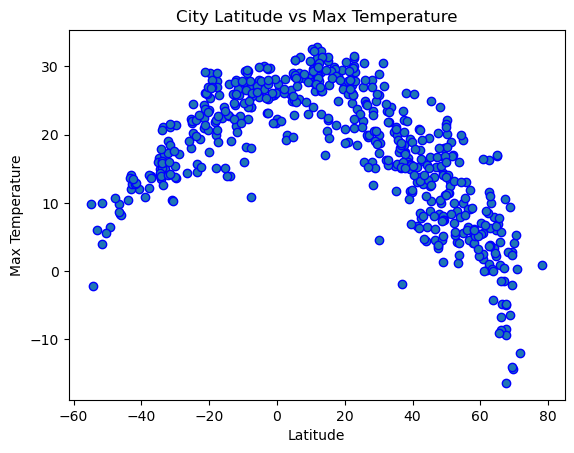

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

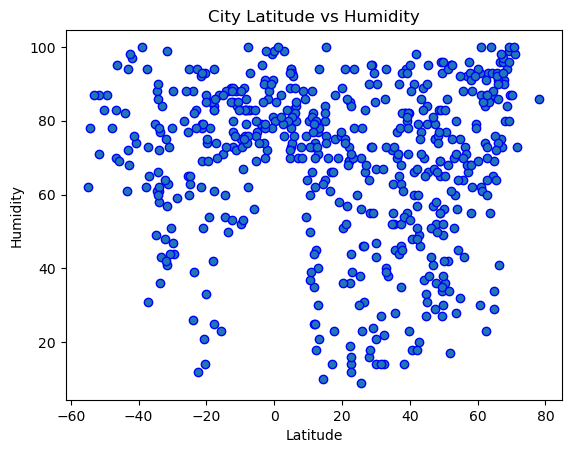

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

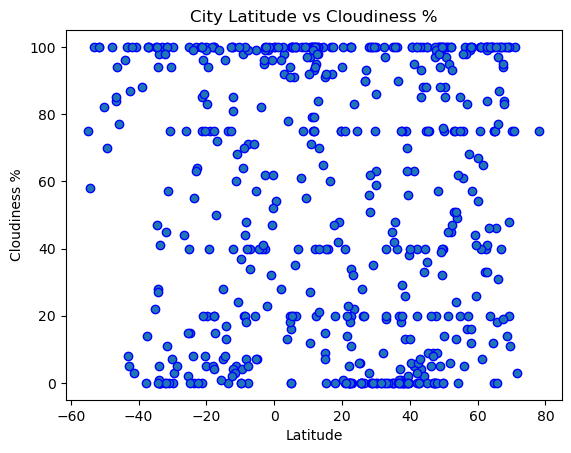

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

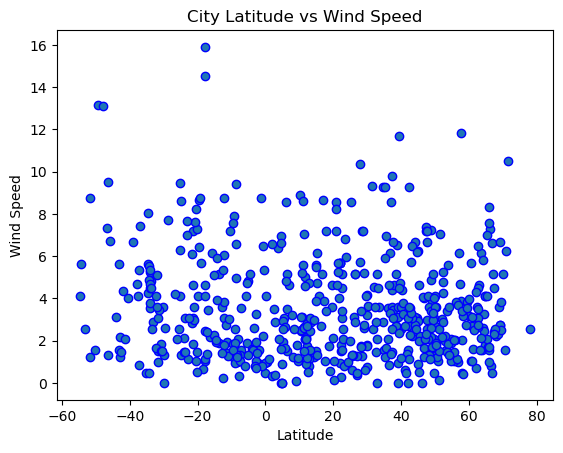

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort william,56.8165,-5.1121,9.06,92,16,1.00,GB,1683768288
3,sabinanigo,42.5192,-0.3661,7.84,79,3,2.68,ES,1683768173
5,tura,25.5198,90.2201,26.92,56,0,1.29,IN,1683768289
6,kingston,17.9970,-76.7936,28.53,75,20,7.20,JM,1683768289
7,phek,25.6667,94.5000,15.95,70,0,0.59,IN,1683768289


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port alfred,-33.5906,26.8910,21.12,36,0,4.81,ZA,1683768288
2,port-aux-francais,-49.3500,70.2167,6.49,87,70,13.15,TF,1683768288
4,invercargill,-46.4000,168.3500,8.34,95,94,1.34,NZ,1683768288
9,grytviken,-54.2811,-36.5092,-2.14,78,58,5.61,GS,1683768289
10,saldanha,-33.0117,17.9442,15.03,84,100,2.86,ZA,1683768289


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8539821837980216


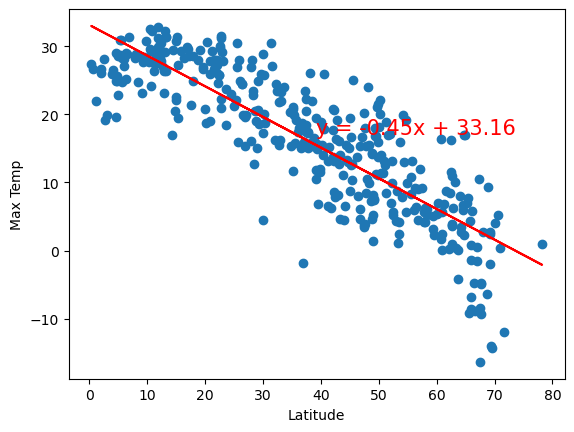

None


In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.8215981260197304


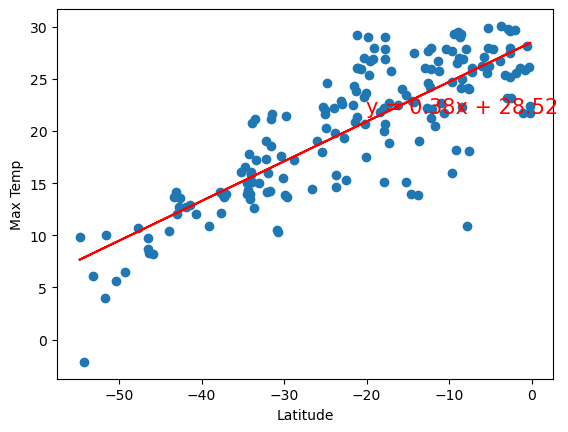

None


In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** As we can visualize from the regression plots, the closer a city is to a 0* Latitude, the warmer the temperature will be. The inverse can be deduced as well. The further away from 0* Latitude, the colder the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11075820495464142


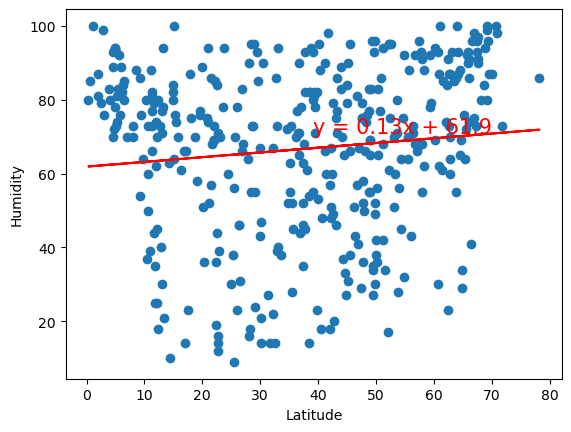

None


In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.14688055737187278


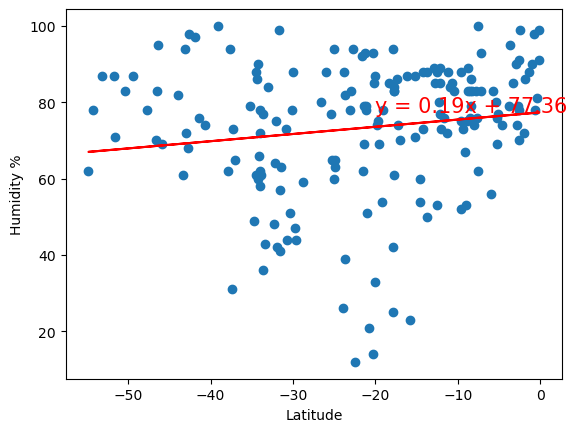

None


In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.ylabel("Humidity %")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Unlike our Temperature vs Latitude graphs, we are unable to establish a correlation between latitude and humidity in each hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.026323804352234793


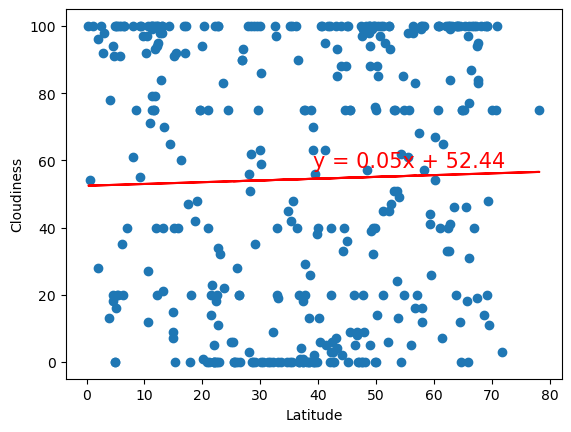

None


In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.09076925256945823


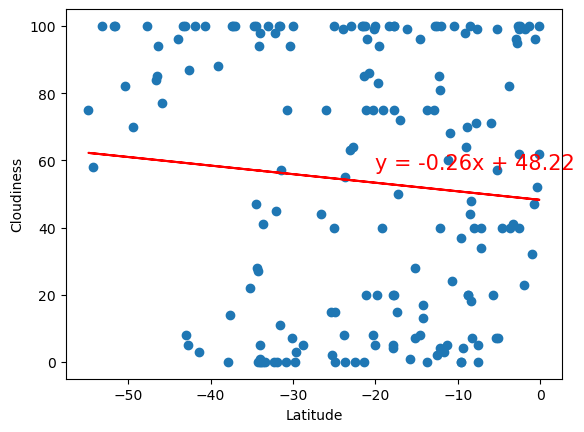

None


In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Cloudiness in the northern hemisphere doesn't offer much correlation with latitude. However in the southern hemisphere, we see a greater correlation than the northern hemisphere. As we move closer to 0* Latitude, the more evenly dispersed the cloudiness percentage is.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.028772833763546536


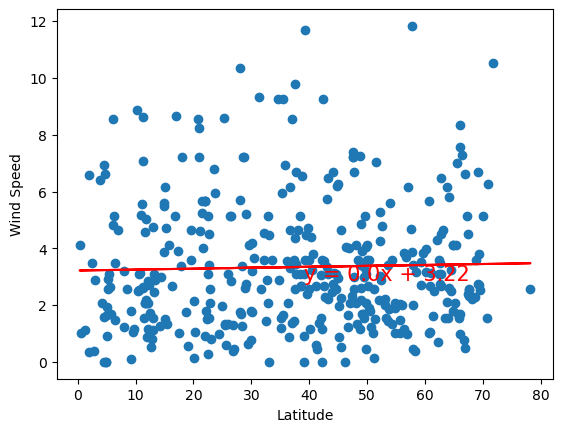

None


In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.21096493227637206


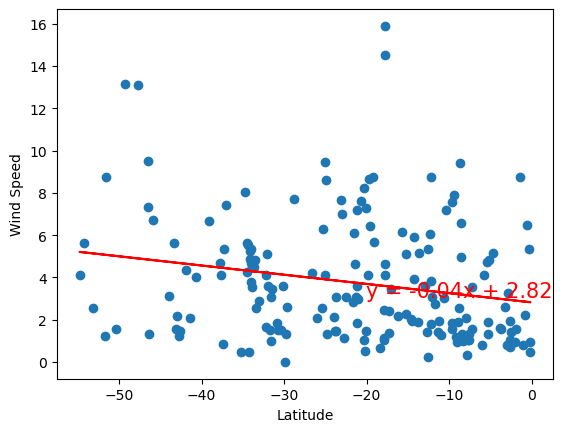

None


In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** These graphs do not off a correlation between latitude and wind speed in both hemispheres. As we move closer to 0* Latitude, the wind speed is between 2-10 just as it would be the further away we move from 0* Latitude.